In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [505]:
data = pd.read_csv("ai4i2020.csv")
data.head()

#Target variable is machine failure

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [506]:
df2 = data.drop(['UDI', 'Product ID'], axis = 'columns')
df2.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [507]:
df2.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [508]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
 7   TWF                      10000 non-null  int64  
 8   HDF                      10000 non-null  int64  
 9   PWF                      10000 non-null  int64  
 10  OSF                      10000 non-null  int64  
 11  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 937.6+ KB


In [509]:
df2.isnull().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [510]:
df3 = df2.copy()

In [511]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df3['Type']=le.fit_transform(df3['Type'])

df3.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [512]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  int32  
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
 7   TWF                      10000 non-null  int64  
 8   HDF                      10000 non-null  int64  
 9   PWF                      10000 non-null  int64  
 10  OSF                      10000 non-null  int64  
 11  RNF                      10000 non-null  int64  
dtypes: float64(3), int32(1), int64(8)
memory usage: 898.6 KB


In [513]:
df3['Air temperature [K]'].unique()

array([298.1, 298.2, 298.3, 298.5, 298.4, 298.6, 298.7, 298.8, 298.9,
       299. , 299.1, 298. , 297.9, 297.8, 297.7, 297.6, 297.5, 297.4,
       297.3, 297.2, 297.1, 297. , 296.9, 296.8, 296.7, 296.6, 296.5,
       296.3, 296.4, 296.2, 296.1, 296. , 295.9, 295.8, 295.7, 295.6,
       295.5, 295.4, 295.3, 299.2, 299.3, 299.5, 299.4, 299.6, 299.7,
       299.8, 299.9, 300. , 300.1, 300.2, 300.3, 300.4, 300.5, 300.6,
       300.7, 300.8, 300.9, 301. , 301.1, 301.2, 301.3, 301.4, 301.5,
       301.6, 301.7, 301.8, 301.9, 302. , 302.1, 302.2, 302.3, 302.4,
       302.5, 302.6, 302.7, 302.8, 302.9, 303. , 303.1, 303.2, 303.3,
       303.4, 303.5, 303.6, 303.7, 303.8, 303.9, 304. , 304.1, 304.2,
       304.3, 304.4, 304.5])

In [18]:
df3['Process temperature [K]'].unique()

array([308.6, 308.7, 308.5, 309. , 308.9, 309.1, 309.2, 309.3, 309.4,
       309.5, 308.8, 308.4, 308.3, 308.2, 308.1, 308. , 307.9, 309.6,
       309.7, 309.8, 309.9, 310. , 310.1, 310.2, 307.8, 307.7, 307.6,
       307.5, 307.4, 307.3, 307.2, 307.1, 307. , 306.9, 306.8, 306.7,
       306.6, 306.5, 306.4, 306.3, 306.2, 306.1, 306. , 305.9, 305.8,
       305.7, 310.3, 310.4, 310.5, 310.6, 310.7, 310.8, 310.9, 311. ,
       311.1, 311.2, 311.3, 311.4, 311.5, 311.6, 311.7, 311.8, 311.9,
       312. , 312.1, 312.2, 312.3, 312.4, 312.5, 312.6, 312.7, 312.8,
       313. , 313.1, 312.9, 313.2, 313.3, 313.4, 313.5, 313.6, 313.8,
       313.7])

In [19]:
df3['Rotational speed [rpm]'].unique()

array([1551, 1408, 1498, 1433, 1425, 1558, 1527, 1667, 1741, 1782, 1423,
       1339, 1742, 2035, 1542, 1311, 1410, 1306, 1632, 1375, 1450, 1581,
       1758, 1561, 1861, 1512, 1811, 1439, 1693, 1798, 1419, 1665, 1559,
       1452, 1379, 1350, 1362, 1368, 1372, 1472, 1489, 1843, 1418, 1412,
       2861, 1383, 1497, 1565, 1691, 1477, 1513, 1661, 1378, 1393, 1592,
       1829, 1812, 1523, 1394, 1679, 1466, 1924, 1369, 1601, 1461, 1455,
       1398, 1402, 1445, 1453, 1469, 1422, 1804, 1436, 1544, 1487, 1753,
       1830, 1727, 1622, 1351, 1575, 1750, 1529, 1852, 1991, 1555, 1441,
       1591, 1621, 1572, 1872, 1499, 1486, 1680, 1431, 1564, 1599, 1707,
       1467, 1310, 1546, 1560, 1329, 1413, 1587, 1473, 1737, 1430, 1711,
       1420, 1297, 1449, 1268, 1511, 1778, 1407, 1391, 1612, 1515, 1463,
       1584, 1850, 1528, 1987, 1495, 1478, 1471, 1282, 1586, 1468, 1440,
       1733, 1458, 1318, 1610, 1462, 1382, 1618, 1988, 1304, 1475, 1824,
       1342, 1485, 1446, 1301, 1606, 1539, 1666, 16

In [20]:
df3['Torque [Nm]'].unique()

array([42.8, 46.3, 49.4, 39.5, 40. , 41.9, 42.4, 40.2, 28.6, 28. , 23.9,
       44.3, 51.1, 30. , 19.6, 48.4, 46.6, 45.6, 54.5, 32.5, 42.7, 44.8,
       30.7, 25.7, 37.3, 23.3, 39. , 24.6, 44.2, 30.1, 48.2, 25.5, 48.3,
       34.7, 48.6, 36.7, 39.2, 50.7, 52.5, 45.4, 50.8, 49.1, 48.5, 47.5,
       25.8, 53.9, 44.1,  4.6, 54.9, 43.8, 35.1, 40.7, 40.3, 29.5, 54.4,
       52.6, 38.2, 22.9, 25.9, 38.6, 45.1, 28.7, 32.4, 65.7, 22.6, 45.5,
       44.4, 35. , 32.3, 46.7, 47.9, 41.3, 51.5, 37.9, 49.9, 40.8, 40.1,
       47.6, 26.8, 43.9, 31.8, 45.2, 24.9, 27.1, 43. , 31.9, 52.2, 35.3,
       29.9, 32.7, 25. , 20.7, 40.6, 40.5, 43.4, 31.1, 46.8, 34.1, 22.5,
       43.5, 29.4, 45.7, 33. , 28.1, 44.7, 41.2, 32.2, 60.5, 46.5, 34.3,
       41.1, 27.7, 43.2, 49.6, 53. , 28.5, 55.3, 55.8, 36.1, 35.2, 28.2,
       50.5, 33.6, 48. , 39.9, 37.6, 41. , 27. , 36.2, 19.8, 46. , 47. ,
       60.7, 52.3, 35.5, 43.6, 26. , 32.6, 42.9, 62.3, 59.1, 20.8, 33.7,
       58.3, 21.4, 50.2, 49.8, 24.2, 48.1, 30.6, 56

In [21]:
df3['Tool wear [min]'].unique()

array([  0,   3,   5,   7,   9,  11,  14,  16,  18,  21,  24,  29,  34,
        37,  40,  42,  44,  47,  50,  55,  58,  63,  65,  68,  70,  73,
        75,  77,  82,  84,  86,  89,  91,  93,  95,  98, 101, 104, 106,
       111, 113, 115, 117, 120, 125, 128, 130, 133, 135, 140, 143, 145,
       147, 152, 154, 156, 158, 160, 162, 165, 167, 169, 172, 174, 177,
       179, 181, 184, 189, 191, 193, 196, 198, 200, 202, 204, 206, 208,
         2,   4,  13,  15,  17,  20,  25,  27,  30,  33,  35,  53,  57,
        59,  61,  66,  72,  80,  92,  97,  99, 103, 108, 110, 112, 114,
       116, 118, 122, 124, 126, 132, 138, 148, 150, 155, 157, 159, 161,
       164, 186, 188, 194, 203, 211, 214, 216, 218,   8,  10,  22,  32,
        39,  41,  43,  45,  49,  54,  67,  69,  74,  76,  81,  96, 105,
       107, 119, 137, 142, 144, 146, 151, 153, 166, 168, 170, 173, 175,
       183, 185, 190, 195, 197, 209, 212,  19,  51,  56,  78,  83,  85,
        88,  90,  94, 109, 131, 134, 136, 192, 199, 201, 205, 21

### Checking distribution of Target Var (Machine Fail) - This section is for Improvements - can be skipped entirely. Refer to documentation on how undersampling improved the results. 

Machine failure
0    9661
1     339
Name: Machine failure, dtype: int64

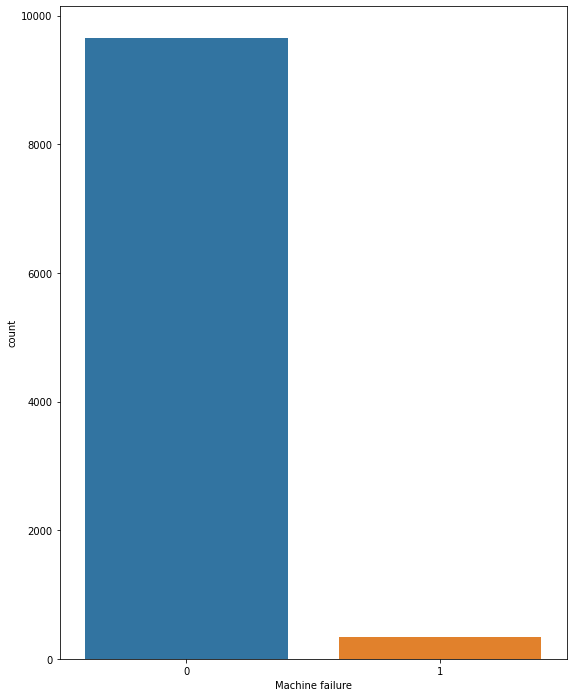

In [499]:
# plt.figure(figsize=(20,12))

# plt.subplot(1,2,1)
# sns.countplot(x = 'Machine failure', data = df2)

# df3.groupby('Machine failure')['Machine failure'].agg('count')

### This shows that a LOT of the dataset is biased towards 0 aka not failing. Thus, the dataset needs to be undersampled.

In [42]:
#Checking highest count of failure type

# df3.groupby('TWF').agg('count')

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,HDF,PWF,OSF,RNF
TWF,,,,,,,,,,,
0,9954,9954,9954,9954,9954,9954,9954,9954,9954,9954,9954
1,46,46,46,46,46,46,46,46,46,46,46


In [25]:
# df3.groupby('HDF').agg('count')

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,PWF,OSF,RNF,H,L,M
HDF,,,,,,,,,,,,,
0,9885,9885,9885,9885,9885,9885,9885,9885,9885,9885,9885,9885,9885
1,115,115,115,115,115,115,115,115,115,115,115,115,115


In [26]:
# df3.groupby('PWF').agg('count')

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,OSF,RNF,H,L,M
PWF,,,,,,,,,,,,,
0,9905,9905,9905,9905,9905,9905,9905,9905,9905,9905,9905,9905,9905
1,95,95,95,95,95,95,95,95,95,95,95,95,95


In [27]:
# df3.groupby('OSF').agg('count')

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,RNF,H,L,M
OSF,,,,,,,,,,,,,
0,9902,9902,9902,9902,9902,9902,9902,9902,9902,9902,9902,9902,9902
1,98,98,98,98,98,98,98,98,98,98,98,98,98


In [28]:
# df3.groupby('RNF').agg('count')

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,H,L,M
RNF,,,,,,,,,,,,,
0,9981,9981,9981,9981,9981,9981,9981,9981,9981,9981,9981,9981,9981
1,19,19,19,19,19,19,19,19,19,19,19,19,19


### The highest failure count is of type HDF (Heat Dissipation Failure) of count 115. So, the number of No Failure samples need to be cut down to 115.

In [179]:
# df4 = df3.copy()

# normal_indices = df3[df3['Machine failure'] == 1].index 
# abnormal_indices = df3[df3['Machine failure'] == 0].index 
# sample_size = len(df3[df3['HDF'] == 1])
# random_indices = np.random.choice(abnormal_indices, sample_size, replace=False)
# undersample_indices = np.concatenate([normal_indices, random_indices])

# df4 = df3.loc[undersample_indices]


In [180]:
# df4.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
50,1,298.9,309.1,2861,4.6,143,1,0,0,1,0,0
69,1,298.9,309.0,1410,65.7,191,1,0,0,1,1,0
77,1,298.8,308.9,1455,41.3,208,1,1,0,0,0,0
160,1,298.4,308.2,1282,60.7,216,1,0,0,0,1,0
161,1,298.3,308.1,1412,52.3,218,1,0,0,0,1,0


In [181]:
# df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454 entries, 50 to 8683
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     454 non-null    int64  
 1   Air temperature [K]      454 non-null    float64
 2   Process temperature [K]  454 non-null    float64
 3   Rotational speed [rpm]   454 non-null    int64  
 4   Torque [Nm]              454 non-null    float64
 5   Tool wear [min]          454 non-null    int64  
 6   Machine failure          454 non-null    int64  
 7   TWF                      454 non-null    int64  
 8   HDF                      454 non-null    int64  
 9   PWF                      454 non-null    int64  
 10  OSF                      454 non-null    int64  
 11  RNF                      454 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 46.1 KB


In [100]:
# df4.groupby('HDF').agg('count')

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,PWF,OSF,RNF
HDF,,,,,,,,,,,
0,339,339,339,339,339,339,339,339,339,339,339
1,115,115,115,115,115,115,115,115,115,115,115


In [48]:
# df4.groupby('PWF').agg('count')

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,OSF,RNF
PWF,,,,,,,,,,,
0,359,359,359,359,359,359,359,359,359,359,359
1,95,95,95,95,95,95,95,95,95,95,95


<AxesSubplot:xlabel='Machine failure', ylabel='count'>

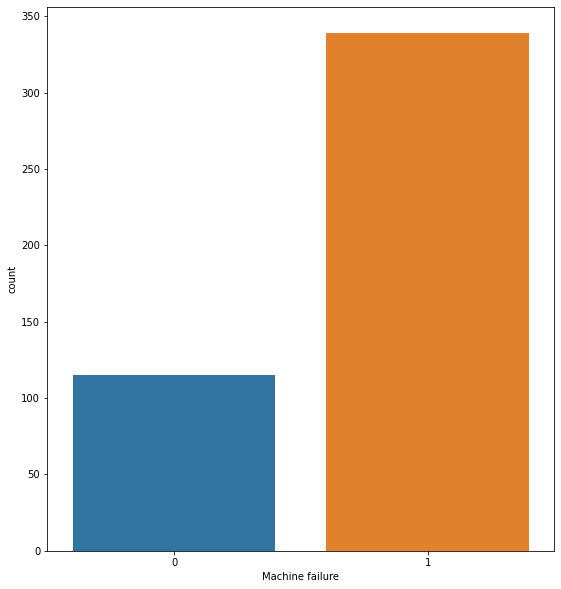

In [489]:
# #Rechecking the shape

# plt.figure(figsize=(20,10))

# plt.subplot(1,2,1)
# sns.countplot(x = 'Machine failure', data = df4)

In [50]:
# df4.describe()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,1.189427,300.692511,310.259471,1501.687225,47.941630,134.665198,0.746696,0.101322,0.253304,0.209251,0.215859,0.002203
std,0.530960,2.067287,1.392073,345.052165,15.543736,72.626887,0.435383,0.302087,0.435383,0.407223,0.411871,0.046932
min,0.000000,295.600000,306.100000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,299.000000,309.300000,1336.000000,39.875000,71.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,300.800000,310.400000,1376.000000,50.750000,146.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,302.400000,311.200000,1495.250000,58.950000,204.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2.000000,304.400000,313.700000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
# pd.DataFrame(df6).describe()

In [ ]:
# df6

## Box Plot (Continuation of EDA)

<AxesSubplot:xlabel='Tool wear [min]'>

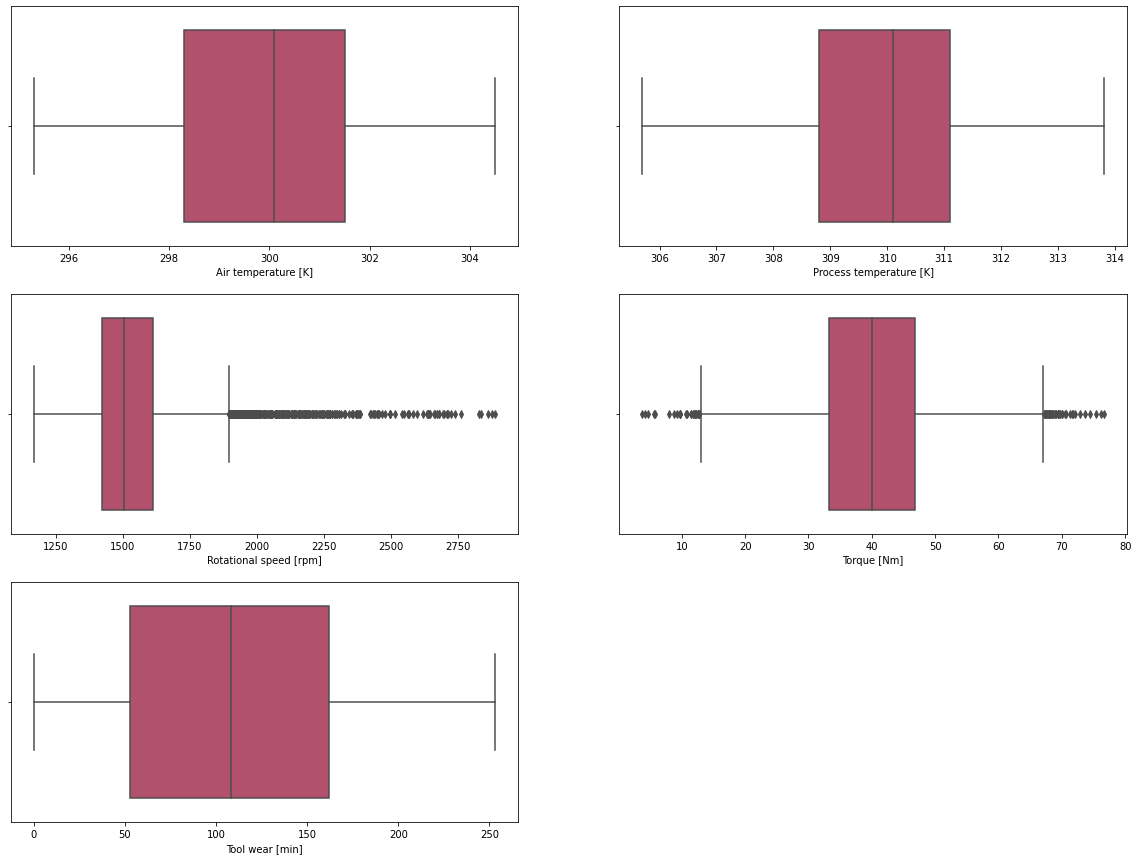

In [514]:
plt.figure(figsize=(20, 15))

plt.subplot(3,2,1)
sns.boxplot(x = 'Air temperature [K]', data = df3, palette='flare')

plt.subplot(3,2,2)
sns.boxplot(x = 'Process temperature [K]', data = df3, palette='flare')

plt.subplot(3,2,3)
sns.boxplot(x = 'Rotational speed [rpm]', data = df3, palette='flare')

plt.subplot(3,2,4)
sns.boxplot(x = 'Torque [Nm]', data = df3, palette='flare')

plt.subplot(3,2,5)
sns.boxplot(x = 'Tool wear [min]', data = df3, palette='flare')

### Torque, Rotational Speed and Process Temperature have some outliers

### But to decide what to do, we first need to see whether these outliers are useful or not

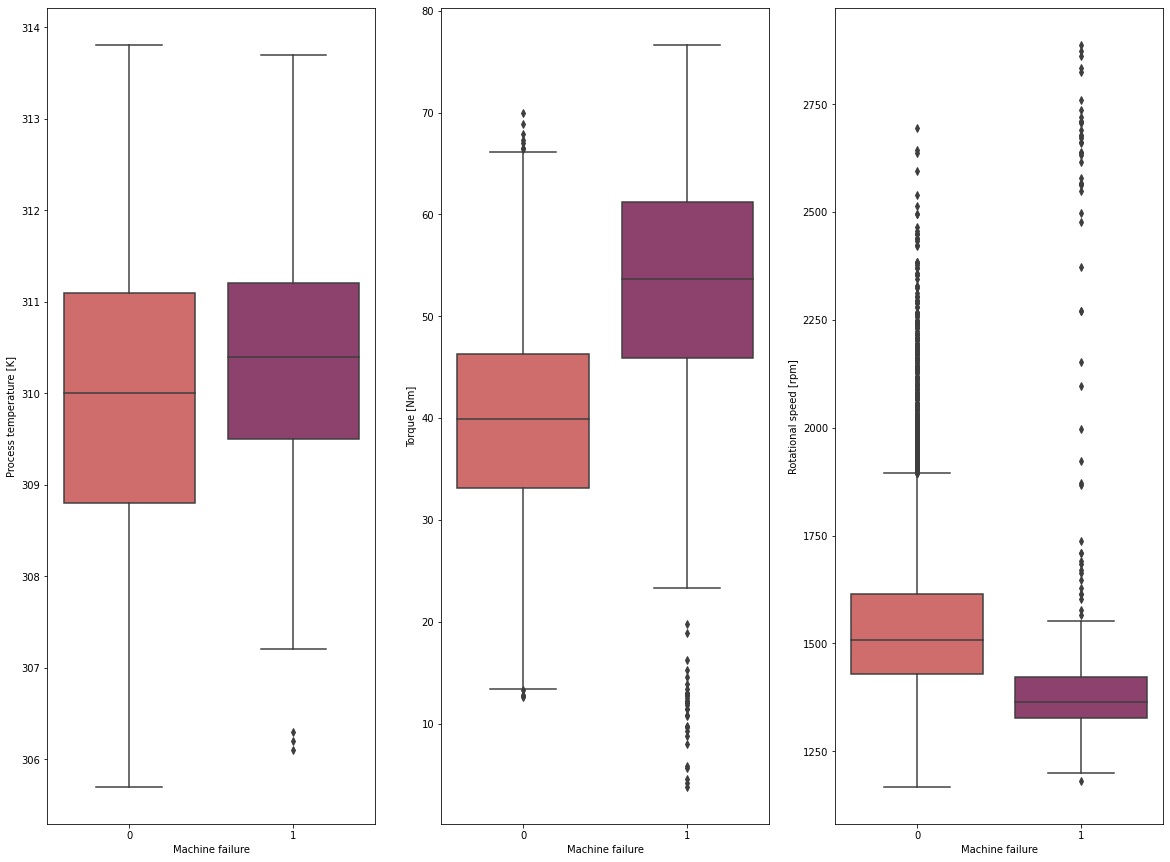

In [515]:
plt.figure(figsize=(20, 15))

#row, col, index
plt.subplot(1,3,1)
sns.boxplot(x = 'Machine failure', y = 'Process temperature [K]', data = df3, palette = 'flare')

plt.subplot(1,3,2)
sns.boxplot(x = 'Machine failure', y = 'Torque [Nm]', data = df3, palette = 'flare')

plt.subplot(1,3,3)
sns.boxplot(x = 'Machine failure', y = 'Rotational speed [rpm]', data = df3, palette = 'flare')

plt.show()

### Plotting these features against Machine failure shows that most of these outliers are in the region where the machine fails, so they should not be eliminated

### However, the outliers where there is no Machine Failure can be removed (Continued after Skewness)

## Bar Graphs

<AxesSubplot:xlabel='Tool wear [min]', ylabel='Count'>

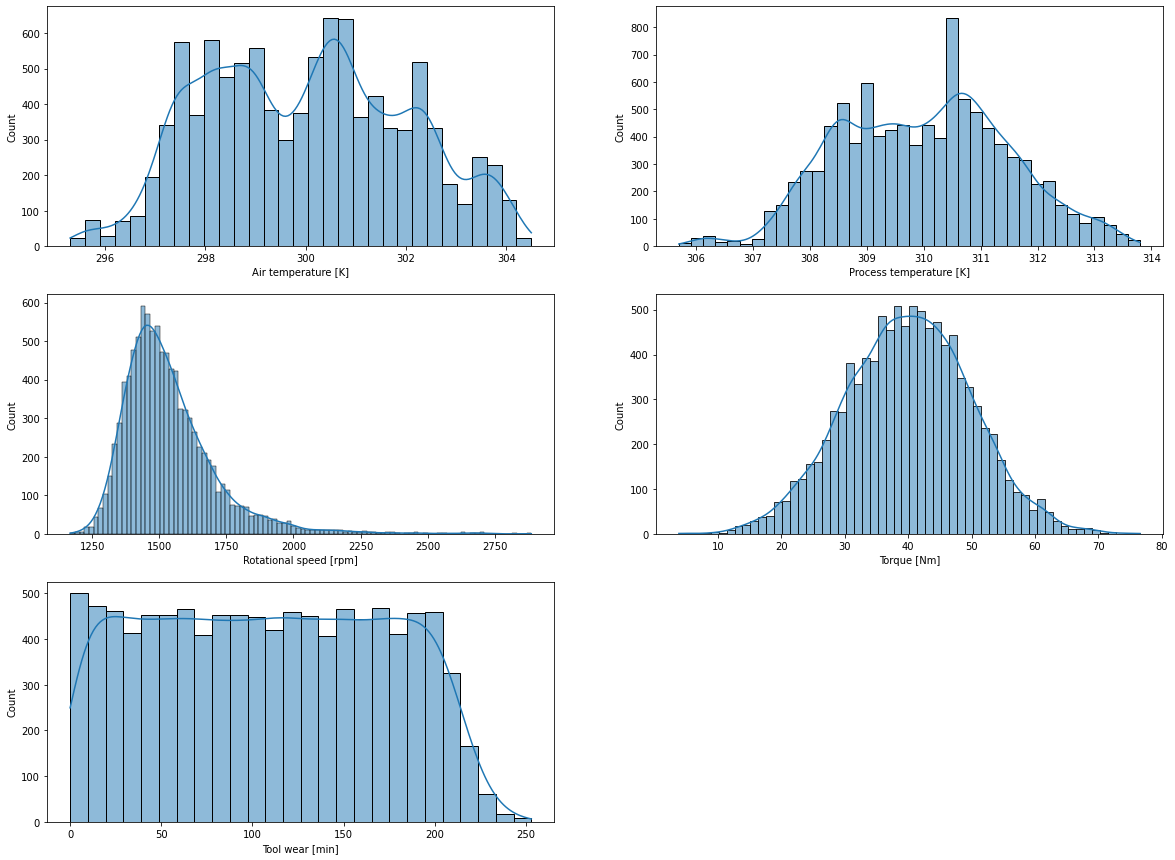

In [516]:
plt.figure(figsize=(20, 15))

plt.subplot(3,2,1)
sns.histplot(df3['Air temperature [K]'], kde=True)

plt.subplot(3,2,2)
sns.histplot(df3['Process temperature [K]'], kde=True)

plt.subplot(3,2,3)
sns.histplot(df3['Rotational speed [rpm]'], kde=True)

plt.subplot(3,2,4)
sns.histplot(df3['Torque [Nm]'], kde=True)

plt.subplot(3,2,5)
sns.histplot(df3['Tool wear [min]'], kde=True)

### Checking skewness values of each field

In [517]:
from scipy.stats import skew

plt.figure(figsize=(20,15))

for idx, col in enumerate(df3):
    print(col)
    print(str(skew(df3[col])) + "\n")
    

Type
-0.11110926316230499

Air temperature [K]
0.11425677871921017

Process temperature [K]
0.015025013585136188

Rotational speed [rpm]
1.9928720166048546

Torque [Nm]
-0.009515168291199652

Tool wear [min]
0.027288145044006527

Machine failure
5.1510789752236485

TWF
14.64226504355156

HDF
9.163413966841123

PWF
10.112999011684671

OSF
9.952422484854512

RNF
22.87613807202946



<Figure size 1440x1080 with 0 Axes>

### Rotational Speed has a high skew value

### However, before adjusting the skewness, we need to determine if there is a strong correlation or not with Machine Failure

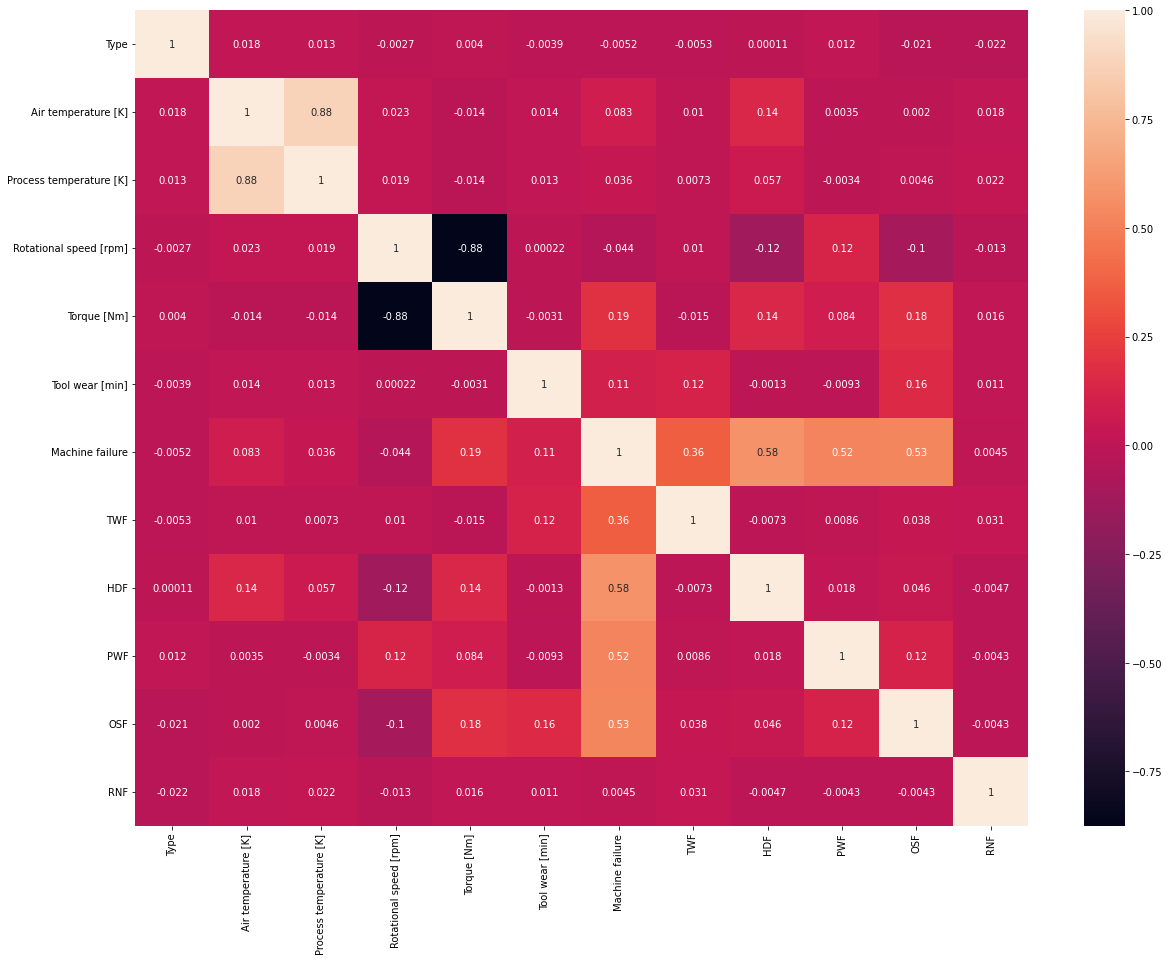

In [518]:
plt.figure(figsize=(20,15))

sns.heatmap(df3.corr(), annot=True)

plt.show()

### Rotational Speed and Torque both have a pretty low correlation w/Machine failure; they can undergo a sqrt transformation

In [519]:
df5 = df3.copy()

In [520]:
df5["Rotational speed [rpm]"] = np.log(df5["Rotational speed [rpm]"])
print("Rotational speed skewness value after square root transformation: " + str(skew(df5["Rotational speed [rpm]"])))

Rotational speed skewness value after square root transformation: 1.3091732026275866


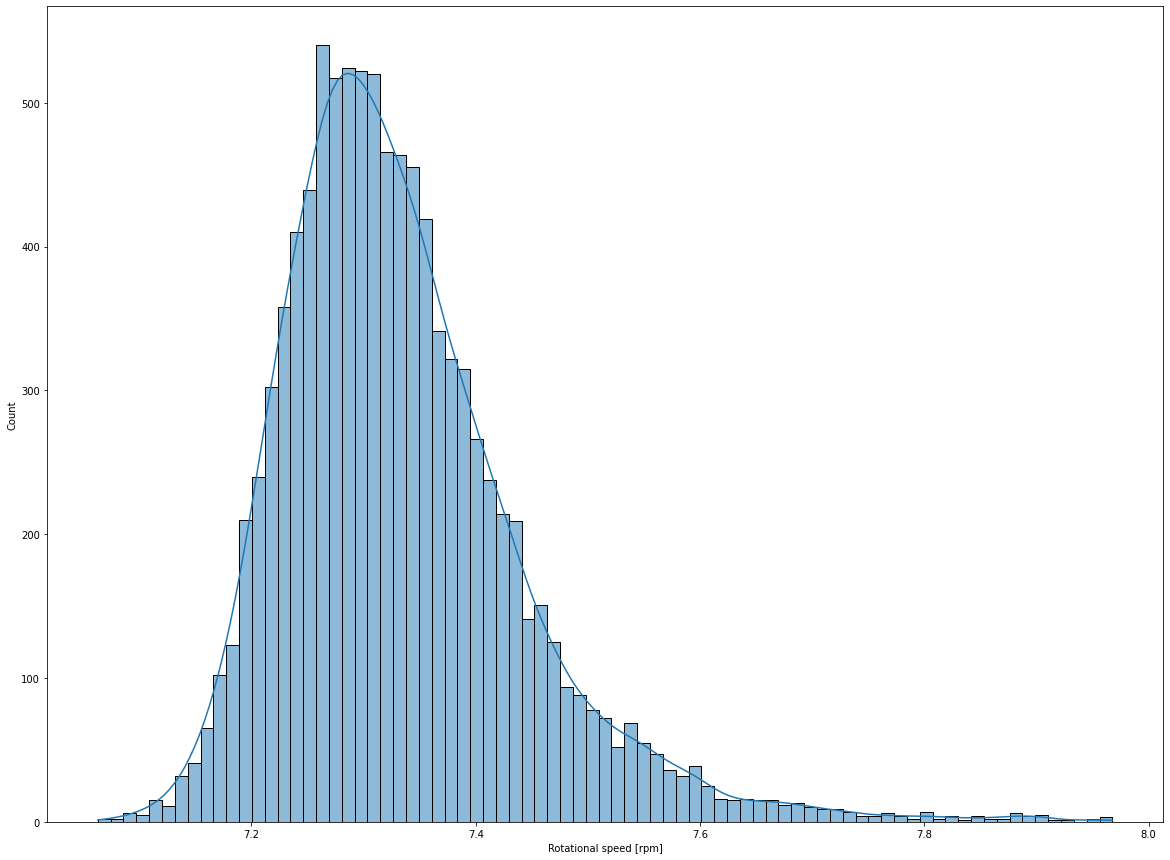

In [521]:
plt.figure(figsize=(20,15))

sns.histplot(df5['Rotational speed [rpm]'], kde=True)

plt.show()

### Removing Outliers where there's no Machine Failure

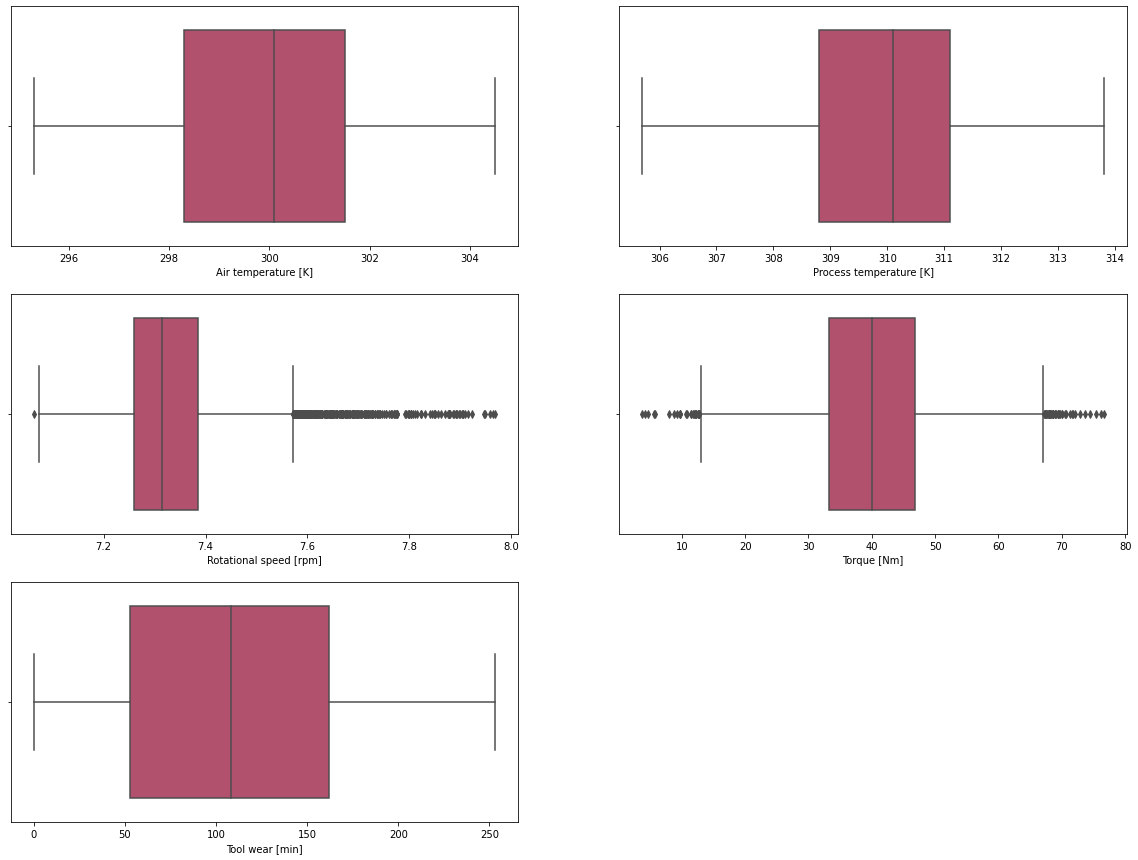

In [522]:
plt.figure(figsize=(20,15))

plt.subplot(3,2,1)
sns.boxplot(x = 'Air temperature [K]', data = df5, palette='flare')

plt.subplot(3,2,2)
sns.boxplot(x = 'Process temperature [K]', data = df5, palette='flare')

plt.subplot(3,2,3)
sns.boxplot(x = 'Rotational speed [rpm]', data = df5, palette='flare')

plt.subplot(3,2,4)
sns.boxplot(x = 'Torque [Nm]', data = df5, palette='flare')

plt.subplot(3,2,5)
sns.boxplot(x = 'Tool wear [min]', data = df5, palette='flare')

plt.show()

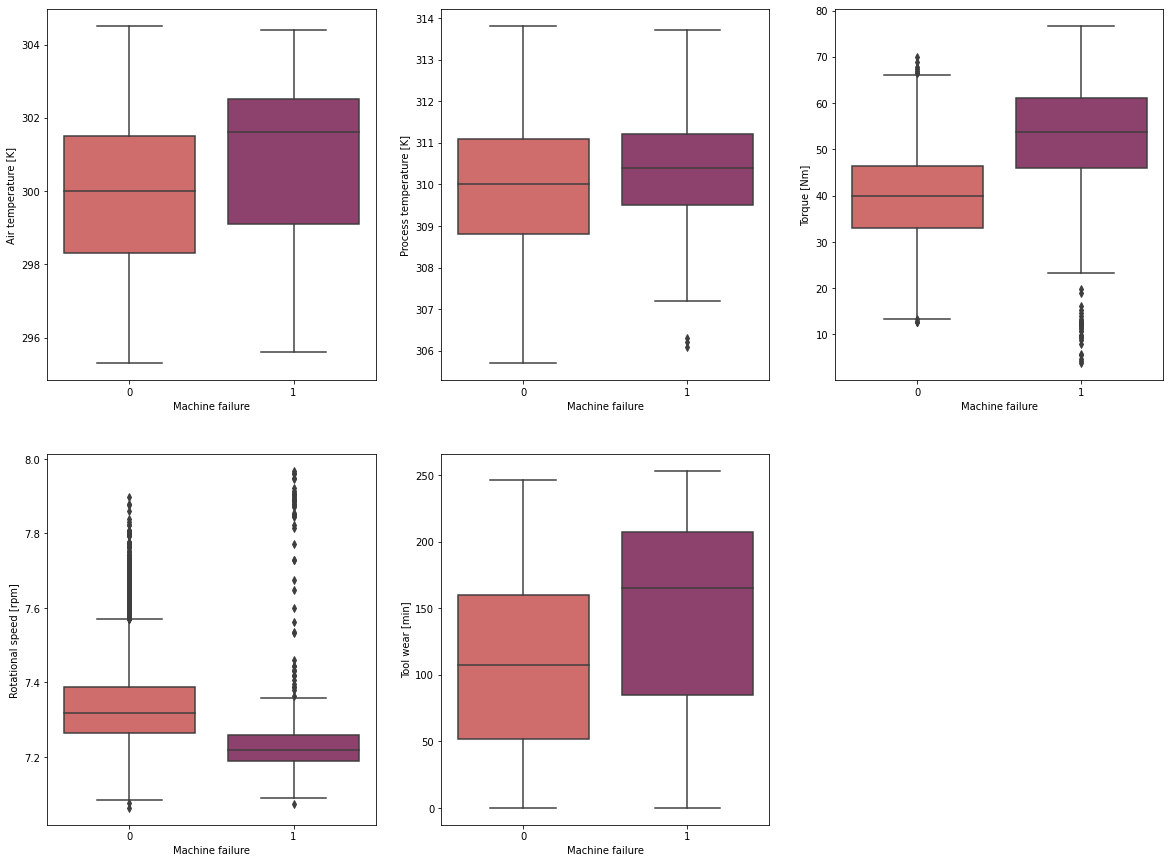

In [523]:
plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.boxplot(x = 'Machine failure', y = 'Air temperature [K]', data = df5, palette = 'flare')

plt.subplot(2,3,2)
sns.boxplot(x = 'Machine failure', y = 'Process temperature [K]', data = df5, palette = 'flare')

plt.subplot(2,3,3)
sns.boxplot(x = 'Machine failure', y = 'Torque [Nm]', data = df5, palette = 'flare')

plt.subplot(2,3,4)
sns.boxplot(x = 'Machine failure', y = 'Rotational speed [rpm]', data = df5, palette = 'flare')

plt.subplot(2,3,5)
sns.boxplot(x = 'Machine failure', y = 'Tool wear [min]', data = df5, palette = 'flare')

plt.show()

In [524]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  int32  
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  float64
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
 7   TWF                      10000 non-null  int64  
 8   HDF                      10000 non-null  int64  
 9   PWF                      10000 non-null  int64  
 10  OSF                      10000 non-null  int64  
 11  RNF                      10000 non-null  int64  
dtypes: float64(4), int32(1), int64(7)
memory usage: 898.6 KB


In [578]:
df5.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,2,298.1,308.6,7.346655,42.8,0,0,0,0,0,0,0
1,1,298.2,308.7,7.249926,46.3,3,0,0,0,0,0,0
2,1,298.1,308.5,7.311886,49.4,5,0,0,0,0,0,0
3,1,298.2,308.6,7.267525,39.5,7,0,0,0,0,0,0
4,1,298.2,308.7,7.249926,40.0,9,0,0,0,0,0,0


In [597]:
df6 = df5.copy()

In [591]:
df6["Rotational speed [rpm]"].max()

7.9676267393338165

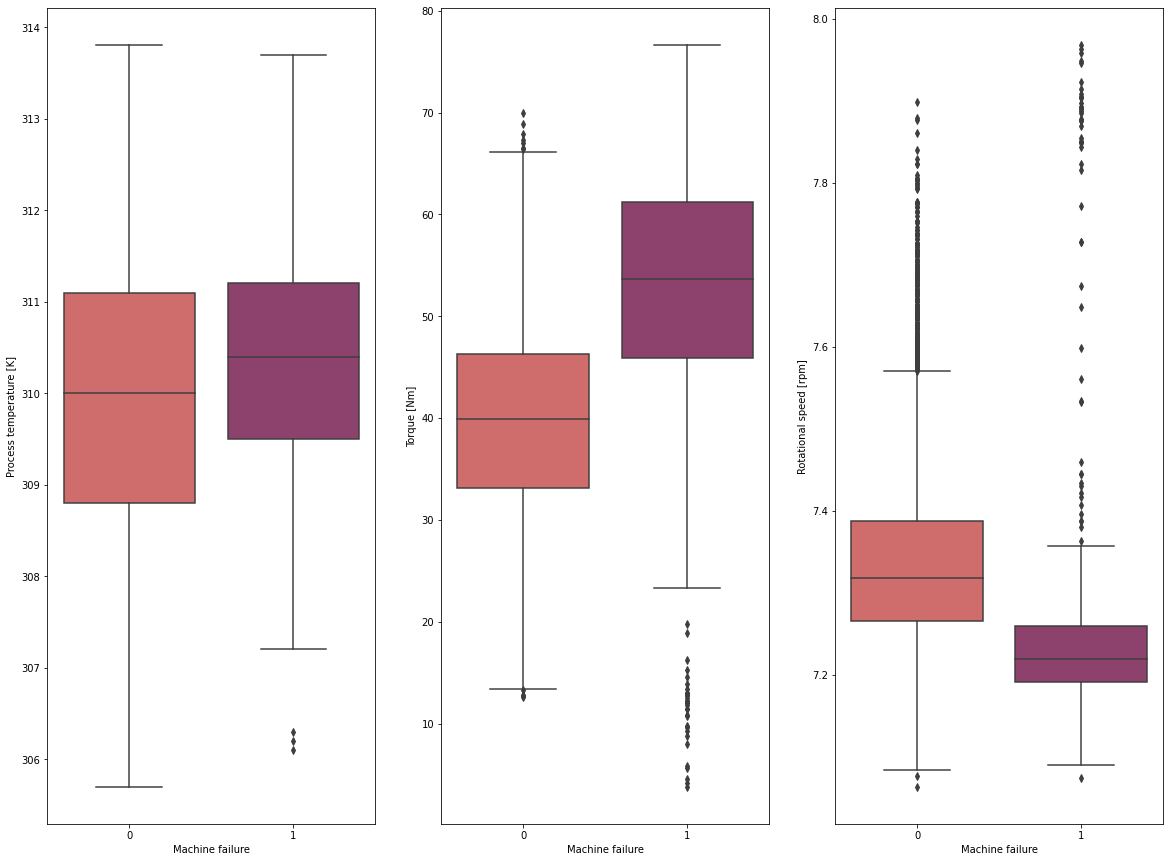

In [598]:
plt.figure(figsize=(20, 15))

#row, col, index
plt.subplot(1,3,1)
sns.boxplot(x = 'Machine failure', y = 'Process temperature [K]', data = df6, palette = 'flare')

plt.subplot(1,3,2)
sns.boxplot(x = 'Machine failure', y = 'Torque [Nm]', data = df6, palette = 'flare')

plt.subplot(1,3,3)
sns.boxplot(x = 'Machine failure', y = 'Rotational speed [rpm]', data = df6, palette = 'flare')

plt.show()

In [599]:
df6.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,2,298.1,308.6,7.346655,42.8,0,0,0,0,0,0,0
1,1,298.2,308.7,7.249926,46.3,3,0,0,0,0,0,0
2,1,298.1,308.5,7.311886,49.4,5,0,0,0,0,0,0
3,1,298.2,308.6,7.267525,39.5,7,0,0,0,0,0,0
4,1,298.2,308.7,7.249926,40.0,9,0,0,0,0,0,0


In [600]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  int32  
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  float64
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
 7   TWF                      10000 non-null  int64  
 8   HDF                      10000 non-null  int64  
 9   PWF                      10000 non-null  int64  
 10  OSF                      10000 non-null  int64  
 11  RNF                      10000 non-null  int64  
dtypes: float64(4), int32(1), int64(7)
memory usage: 898.6 KB


In [601]:
df6 = df6.drop(df6[(df6["Torque [Nm]"] < 17) & (df6["Machine failure"] == 0)].index)

In [602]:
df6 = df6.drop(df6[(df6["Torque [Nm]"] > 60) & (df6["Machine failure"] == 0)].index)

In [603]:
df6 = df6.drop(df6[(df6["Rotational speed [rpm]"] < 7.1) & (df6["Machine failure"] == 0)].index)

In [608]:
df6 = df6.drop(df6[(df6["Rotational speed [rpm]"] > 7.54) & (df6["Machine failure"] == 0)].index)

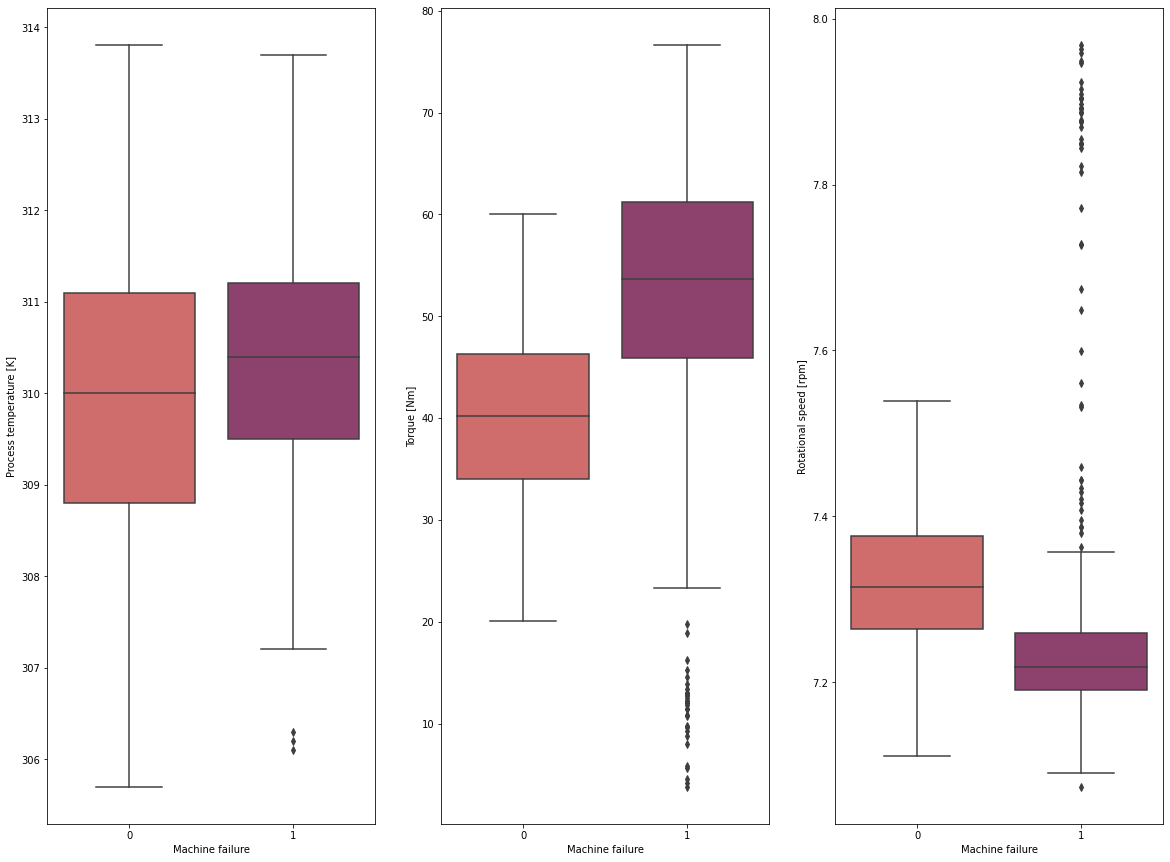

In [609]:
plt.figure(figsize=(20, 15))

#row, col, index
plt.subplot(1,3,1)
sns.boxplot(x = 'Machine failure', y = 'Process temperature [K]', data = df6, palette = 'flare')

plt.subplot(1,3,2)
sns.boxplot(x = 'Machine failure', y = 'Torque [Nm]', data = df6, palette = 'flare')

plt.subplot(1,3,3)
sns.boxplot(x = 'Machine failure', y = 'Rotational speed [rpm]', data = df6, palette = 'flare')

plt.show()

In [610]:
df6.describe()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,9438.000000,9438.000000,9438.000000,9438.000000,9438.000000,9438.000000,9438.000000,9438.000000,9438.000000,9438.000000,9438.000000,9438.000000
mean,1.198559,299.996408,310.002130,7.322140,40.565385,108.275906,0.035919,0.004874,0.012185,0.010066,0.010384,0.001907
std,0.600934,2.000845,1.483151,0.088375,8.899417,63.746654,0.186097,0.069647,0.109716,0.099827,0.101375,0.043632
min,0.000000,295.300000,305.700000,7.074117,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,298.300000,308.800000,7.260523,34.100000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,300.100000,310.100000,7.311886,40.400000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,301.500000,311.100000,7.375256,46.800000,163.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,304.500000,313.800000,7.967627,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


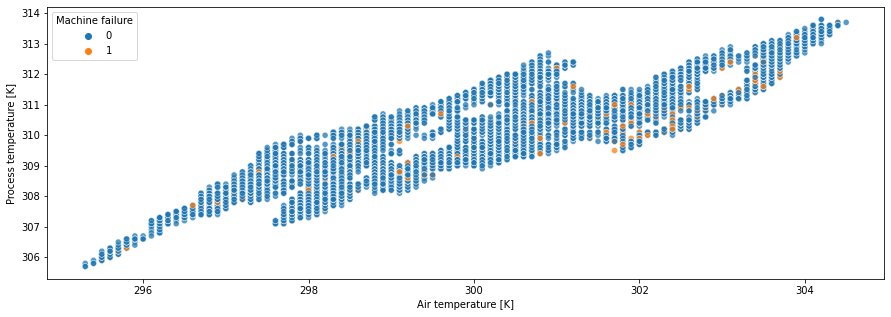

In [611]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Air temperature [K]', y='Process temperature [K]', hue='Machine failure', alpha=0.75, data=df6)
plt.show()

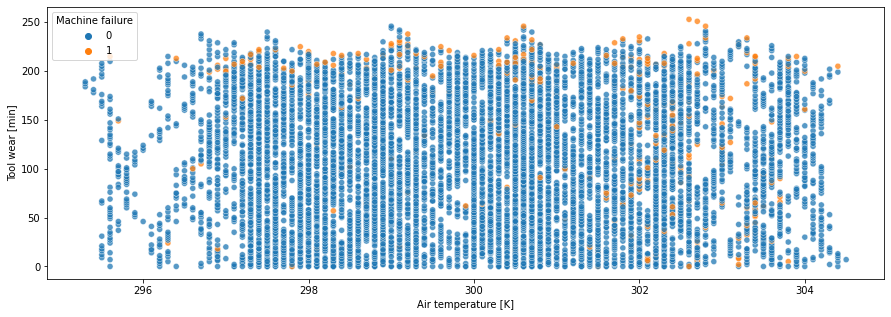

In [296]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Air temperature [K]', y='Tool wear [min]', hue='Machine failure', alpha=0.75, data=df6)
plt.show()

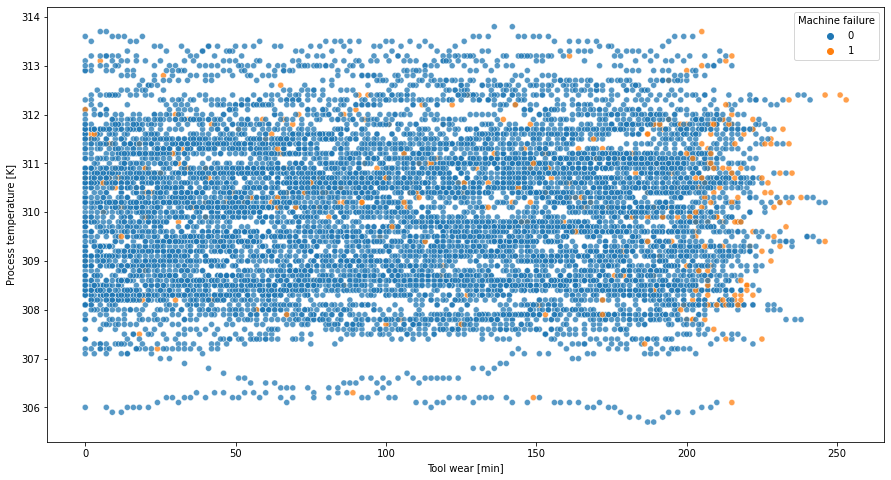

In [301]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Tool wear [min]', y='Process temperature [K]', hue='Machine failure', alpha=0.75, data=df6)
plt.show()

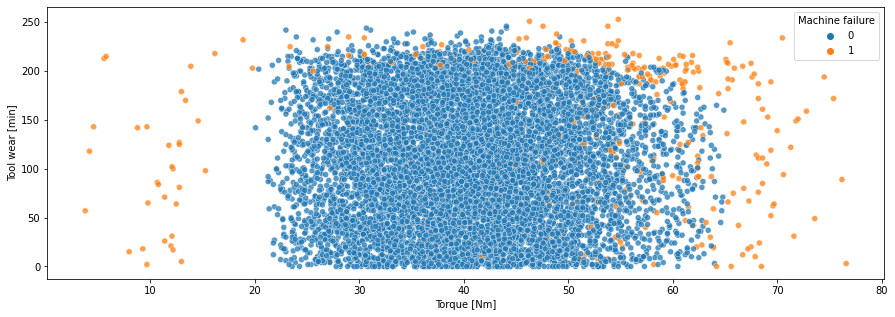

In [304]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Torque [Nm]', y='Tool wear [min]', hue='Machine failure', alpha=0.75, data=df6)
plt.show()

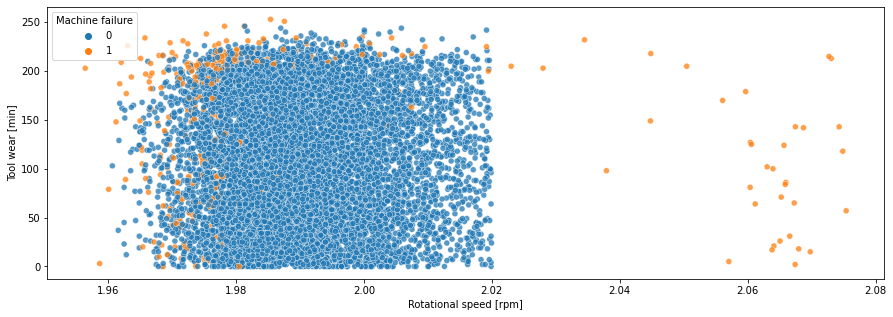

In [307]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Rotational speed [rpm]', y='Tool wear [min]', hue='Machine failure', alpha=0.75, data=df6)
plt.show()

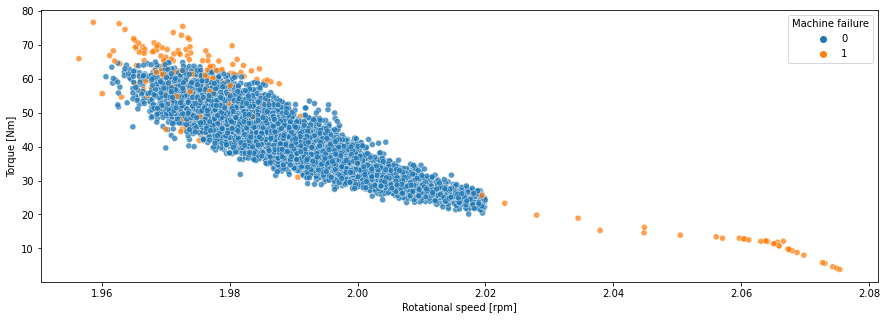

In [308]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Rotational speed [rpm]', y='Torque [Nm]', hue='Machine failure', alpha=0.75, data=df6)
plt.show()

In [612]:
df7 = data[["TWF","HDF", "PWF","OSF","RNF"]]

In [613]:
df6["FailureLabels"] = df7.dot(2**np.arange(df7.shape[1]))

In [ ]:
#0 - No failure
#1 - TWF
#2 - HDF
#4 - PWF
#8 - OSF
#16 - RNF
#17 - TWF + RNF
#12 - PWF + OSF
#6 - HDF + PWF
#9 - TWF + OSF
#10 - HDF + OSF
#13 - TWF + PWF + OSF

In [427]:
# df3["FailureLabels"] = df7.dot(2**np.arange(df7.shape[1]))

In [614]:
#0 - No failure
#1 - TWF
#2 - HDF
#4 - PWF
#8 - OSF
#16 - RNF
#17 - TWF + RNF
#12 - PWF + OSF
#6 - HDF + PWF
#9 - TWF + OSF
#10 - HDF + OSF
#13 - TWF + PWF + OSF

df6.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,FailureLabels
0,2,298.1,308.6,7.346655,42.8,0,0,0,0,0,0,0,0
1,1,298.2,308.7,7.249926,46.3,3,0,0,0,0,0,0,0
2,1,298.1,308.5,7.311886,49.4,5,0,0,0,0,0,0,0
3,1,298.2,308.6,7.267525,39.5,7,0,0,0,0,0,0,0
4,1,298.2,308.7,7.249926,40.0,9,0,0,0,0,0,0,0


In [615]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9438 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     9438 non-null   int32  
 1   Air temperature [K]      9438 non-null   float64
 2   Process temperature [K]  9438 non-null   float64
 3   Rotational speed [rpm]   9438 non-null   float64
 4   Torque [Nm]              9438 non-null   float64
 5   Tool wear [min]          9438 non-null   int64  
 6   Machine failure          9438 non-null   int64  
 7   TWF                      9438 non-null   int64  
 8   HDF                      9438 non-null   int64  
 9   PWF                      9438 non-null   int64  
 10  OSF                      9438 non-null   int64  
 11  RNF                      9438 non-null   int64  
 12  FailureLabels            9438 non-null   int64  
dtypes: float64(4), int32(1), int64(8)
memory usage: 1.3 MB


In [616]:
df6['Rotational speed [rpm]'] = df6['Rotational speed [rpm]'].apply(np.float64)
df6['Tool wear [min]'] = df6['Tool wear [min]'].apply(np.float64)
df6['Machine failure'] = df6['Machine failure'].apply(np.float64)
df6['TWF'] = df6['TWF'].apply(np.float64)
df6['HDF'] = df6['HDF'].apply(np.float64)
df6['PWF'] = df6['PWF'].apply(np.float64)
df6['OSF'] = df6['OSF'].apply(np.float64)
df6['RNF'] = df6['RNF'].apply(np.float64)
df6['FailureLabels'] = df6['FailureLabels'].apply(np.float64)

In [439]:
# df3['Rotational speed [rpm]'] = df3['Rotational speed [rpm]'].apply(np.float64)
# df3['Tool wear [min]'] = df3['Tool wear [min]'].apply(np.float64)
# df3['Machine failure'] = df3['Machine failure'].apply(np.float64)
# df3['TWF'] = df3['TWF'].apply(np.float64)
# df3['HDF'] = df3['HDF'].apply(np.float64)
# df3['PWF'] = df3['PWF'].apply(np.float64)
# df3['OSF'] = df3['OSF'].apply(np.float64)
# df3['RNF'] = df3['RNF'].apply(np.float64)
# df3['FailureLabels'] = df3['FailureLabels'].apply(np.float64)

In [617]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9438 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     9438 non-null   int32  
 1   Air temperature [K]      9438 non-null   float64
 2   Process temperature [K]  9438 non-null   float64
 3   Rotational speed [rpm]   9438 non-null   float64
 4   Torque [Nm]              9438 non-null   float64
 5   Tool wear [min]          9438 non-null   float64
 6   Machine failure          9438 non-null   float64
 7   TWF                      9438 non-null   float64
 8   HDF                      9438 non-null   float64
 9   PWF                      9438 non-null   float64
 10  OSF                      9438 non-null   float64
 11  RNF                      9438 non-null   float64
 12  FailureLabels            9438 non-null   float64
dtypes: float64(12), int32(1)
memory usage: 1.3 MB


In [618]:
#Binning

df6["Air temperature [K]"] = pd.cut(df6["Air temperature [K]"].values, bins = 10, labels = False)
df6["Process temperature [K]"] = pd.cut(df6["Process temperature [K]"].values, bins = 9, labels = False)
df6["Rotational speed [rpm]"] = pd.cut(df6["Rotational speed [rpm]"].values, bins = 18, labels = False)
df6["Torque [Nm]"] = pd.cut(df6["Torque [Nm]"].values, bins = 8, labels = False)
df6["Tool wear [min]"] = pd.cut(df6["Tool wear [min]"].values, bins = 5, labels = False)

In [481]:
# df3["Air temperature [K]"] = pd.cut(df3["Air temperature [K]"].values, bins = 10, labels = False)
# df3["Process temperature [K]"] = pd.cut(df3["Process temperature [K]"].values, bins = 9, labels = False)
# df3["Rotational speed [rpm]"] = pd.cut(df3["Rotational speed [rpm]"].values, bins = 18, labels = False)
# df3["Torque [Nm]"] = pd.cut(df3["Torque [Nm]"].values, bins = 8, labels = False)
# df3["Tool wear [min]"] = pd.cut(df3["Tool wear [min]"].values, bins = 5, labels = False)

In [501]:
# df3.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [619]:
import math

class NaiveBayesG:
    
    def separateClasses(self, X, y):
        self.classes = np.unique(y)
        cls, counts = np.unique(y, return_counts=True)
        subsets = {}
        cls_idx = {}
        self.cls_frequency = dict(zip(cls, counts))
        for clsLabel in self.classes:
            cls_idx[clsLabel] = np.argwhere(y==clsLabel)
            subsets[clsLabel] = X[cls_idx[clsLabel],:]
            self.cls_frequency[clsLabel] = self.cls_frequency[clsLabel]/sum(list(self.cls_frequency.values()))
        return subsets
    
    def fit(self, X, y):
        split_X = self.separateClasses(X, y)
        self.means = {}
        self.std = {}
        for clsLabel in self.classes:
            self.means[clsLabel] = np.mean(split_X[clsLabel], axis=0)[0]
            self.std[clsLabel] = np.std(split_X[clsLabel], axis=0)[0]
            
    def calcProb(self, x, mean, stdev):
        try:
            exponent = math.exp(-(math.pow(x - mean, 2) / (2 * math.pow(stdev, 2))))
        except ZeroDivisionError:
            exponent = 0
        return (1 / (math.sqrt(2 * math.pi) * stdev)) * exponent
    
    
    def predict_proba(self, X):
        self.cls_probability = {cls:math.log(self.cls_frequency[cls], math.e) for cls in self.classes}
        for cls in self.classes:
            for i in range(6):
                self.cls_probability[cls]+=math.log(self.calcProb(X[i], self.means[cls][i], self.std[cls][i]), math.e)
        self.cls_probability = {cls: math.e**self.cls_probability[cls] for cls in self.cls_probability}
        return self.cls_probability
    
    def predict(self, X):
        prediction = []
        for x in X:
            max_prob = 0
            pred_cls = None
            for cls, prob in self.predict_proba(x).items():
                if prob>max_prob:
                    max_prob = prob
                    pred_cls = cls
            prediction.append(pred_cls)
        return prediction


In [620]:
df6 = df6.sample(8000)
# df3 = df3.sample(8000)

X = df6.drop(["Machine failure","TWF", "HDF","PWF","OSF","RNF","FailureLabels"], axis = 1)
y = df6["FailureLabels"]

# X = df3.drop(["Machine failure","TWF", "HDF","PWF","OSF","RNF","FailureLabels"], axis = 1)
# y = df3["FailureLabels"]

In [621]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [622]:
X_test

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
9342,0,3,3,7,3,0
4484,2,7,5,4,4,0
221,0,3,3,8,2,3
2223,1,4,3,3,4,3
8718,1,2,3,4,3,1
...,...,...,...,...,...,...
8243,0,4,5,2,5,2
6798,1,6,5,7,3,1
1772,1,3,2,4,4,0
3112,2,4,3,2,5,0


In [486]:
# df3.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,FailureLabels
9908,1,3,3,3,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2182,2,4,3,1,6,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4963,1,9,7,6,2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9462,1,3,3,4,4,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1914,1,2,2,4,3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [623]:
df6.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,FailureLabels
5815,1,6,5,6,3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6497,1,5,4,2,6,3,1.0,0.0,0.0,0.0,1.0,0.0,8.0
2780,2,5,4,5,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201,1,3,3,5,4,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4570,1,8,5,2,5,0,1.0,0.0,1.0,0.0,0.0,0.0,2.0


In [624]:
X_train = X_train.astype(np.float64, copy=False)
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

nb = NaiveBayesG()
nb.fit(X_train, y_train)

In [625]:
y_test = y_test.to_numpy()
X_test = X_test.to_numpy()

predictions = nb.predict(X_test)

print("Naive Bayes classification accuracy", accuracy_score(y_test, predictions))

Naive Bayes classification accuracy 0.639
